In [1]:
#Calling out packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler



from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


smote=SMOTE()
ss=StandardScaler()


log=LogisticRegressionCV()
nb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adaboost=AdaBoostClassifier()
bag=BaggingClassifier()
grad=GradientBoostingClassifier()
nn=MLPClassifier()

models=[log,nb,knn,dt,rf,adaboost,bag,grad,nn]




sns.set({'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Quantile Function for Outliers.
def quantile_fun(col):

    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr=q3-q1
    lw=q1-(1.5*iqr) #LowerWhisker
    uw=q3+(1.5*iqr) #UpperWhisker
    new_col=[]
    for i in col:
        if i<lw:
            i=lw
            new_col.append(i)
        elif i>uw:
            i=uw
            new_col.append(i)
        else:
            i=i
            new_col.append(i)
    return np.array(new_col)

In [3]:
#Complete Data Structure
data=pd.read_parquet('/home/hashmi/Files/UpgradeSeedClassifier/InitialAnalysis/data/true_no_hits_15114101.parquet')
print(f'Dimension of initial data table is {data.shape[0]} rows and {data.shape[1]} columns')

Dimension of initial data table is 10568908 rows and 25 columns


In [4]:
#Consider small sample from the entire data pool.
sample=data.head(10000)

In [5]:
print(f'Dimension of sample data table is {data.shape[0]} rows and {sample.shape[1]} columns')
sample.head()

Dimension of sample data table is 10568908 rows and 25 columns


,track_charge,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,...,eventID,particle_key,particle_hasScifi,particle_hasUT,particle_hasVelo,particle_isDown,particle_isDown_noVelo,particle_isLong,particle_isLong_andUT,partiole_isElectron
0,1.0,2.261579,0.376930,11.0,4923.881506,-3.115572,-3.072188,603.199306,-601.747070,-41.831402,...,159651,2222,True,False,False,False,False,False,False,True
1,-1.0,6.342810,0.906116,12.0,2159.286580,-0.006293,-0.041903,1145.680471,1144.674805,-47.993053,...,159651,2224,True,False,False,False,False,False,False,True
2,-1.0,7.558596,1.259766,11.0,1953.560581,-0.024234,-0.155405,1514.672557,1496.419067,-234.441742,...,159651,2242,True,True,True,True,False,True,True,True
3,1.0,4.356195,0.726032,11.0,3825.724500,3.122918,2.986581,579.261462,-572.315918,89.433388,...,159651,2255,True,True,False,True,True,False,False,False
4,-1.0,3.676422,0.525203,12.0,1799.832644,0.115020,0.578678,1265.392218,1059.369507,692.064819,...,159651,2265,True,True,False,True,True,False,False,False


In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 5
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_charge            10000 non-null  float64
 1   track_chi2              10000 non-null  float64
 2   track_chi2PerDoF        10000 non-null  float64
 3   track_nLHCbIDs          10000 non-null  float64
 4   track_p                 10000 non-null  float64
 5   track_phi               10000 non-null  float64
 6   track_position_phi      10000 non-null  float64
 7   track_position_r        10000 non-null  float64
 8   track_position_x        10000 non-null  float64
 9   track_position_y        10000 non-null  float64
 10  track_position_z        10000 non-null  float64
 11  track_pt                10000 non-null  float64
 12  track_tx                10000 non-null  float64
 13  track_ty                10000 non-null  float64
 14  track_pseudoRapidity    10000 non-null  fl

### Out of 25 attribures 8 of them are boolean values representing labels for the track/particle. These can be avoided and retain the specific label that we are looking for. For the first run, check with all the variables available in the data.

In [7]:
sample['particle_isDown_noVelo'].value_counts(normalize=True)*100

False    85.99
True     14.01
Name: particle_isDown_noVelo, dtype: float64

### Sample data and the actual data are highly screwed towards False. This huge imbalance can badly impact the results.

In [8]:
#Dependent and Independent Parameters.
x=sample.drop(['particle_isDown_noVelo'],axis=1)
y=sample['particle_isDown_noVelo']

In [9]:
#Imbalance Data Correction
x,y=smote.fit_resample(x,y)

In [10]:
#Train and Test Data Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
#Considering Random Forest Classifier as the base model for analysis.
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
print(f'Accuracy of the model is {accuracy_score(y_test,y_predict)} %')

Accuracy of the model is 1.0 %


### Even after correcting the imbalance data, model accuracy went way higher than expected. Look for causes.

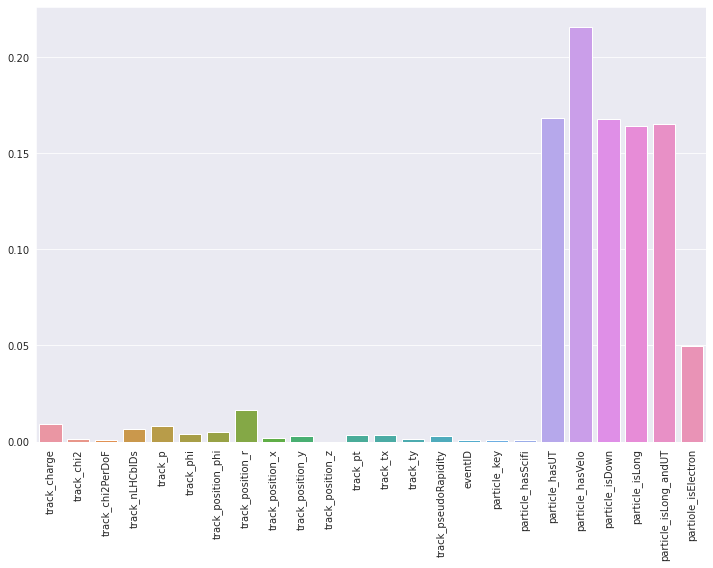

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x=x.columns,y=rf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

### From the above feature importance map, it is clear that the partcle/track labels are impacting more on the model

In [13]:
#Define the function for easy access.
def model_performance(sample_data,model):
    x=sample_data.drop(['particle_isDown_noVelo'],axis=1)
    y=sample_data['particle_isDown_noVelo']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    sns.barplot(x=x.columns,y=model.feature_importances_)
    plt.xticks(rotation=90)
    plt.show()
    return (f'Accuracy of the model is {accuracy_score(y_test,y_predict)} %')
    

In [14]:
#Remove those attributes from further analysis and verify the results.
sample_01=sample.drop(['particle_hasScifi', 'particle_hasUT',
       'particle_hasVelo', 'particle_isDown',
       'particle_isLong', 'particle_isLong_andUT', 'partiole_isElectron'],axis=1)

In [15]:
x=sample_01.drop(['particle_isDown_noVelo'],axis=1)
y=sample_01['particle_isDown_noVelo']
x,y=smote.fit_resample(x,y)
sample_01=pd.concat([x,y],axis=1)

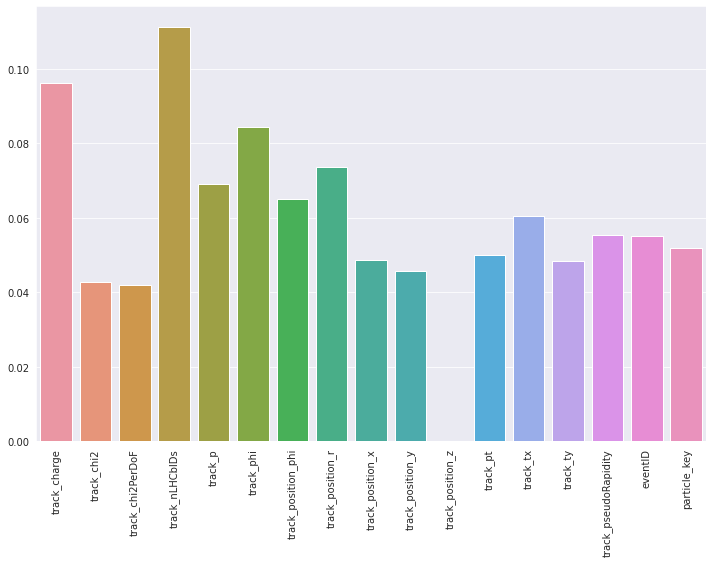

'Accuracy of the model is 0.8883720930232558 %'

In [16]:
model_performance(sample_01,rf)

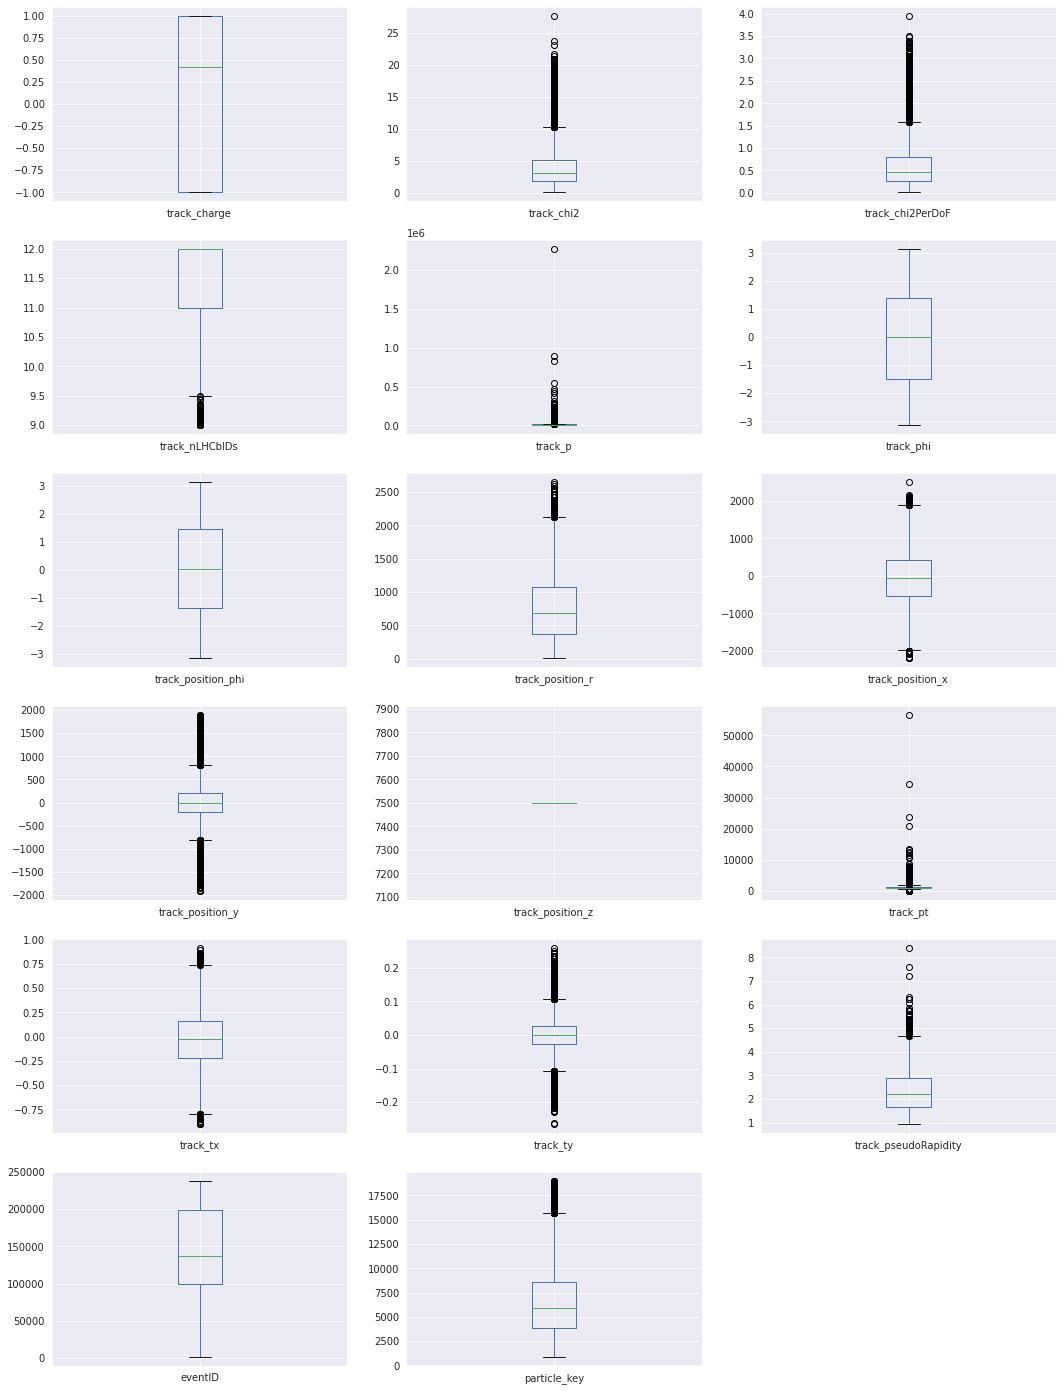

In [17]:
sample_01.plot.box(subplots=True,layout=(6,3),figsize=(18,25))
plt.show()

In [18]:
#To check if scaling is required?
sample_01.describe()

,track_charge,track_chi2,track_chi2PerDoF,track_nLHCbIDs,track_p,track_phi,track_position_phi,track_position_r,track_position_x,track_position_y,track_position_z,track_pt,track_tx,track_ty,track_pseudoRapidity,eventID,particle_key
count,17198.000000,17198.000000,17198.000000,17198.000000,1.719800e+04,17198.000000,17198.000000,17198.000000,17198.000000,17198.000000,17198.0,17198.000000,17198.000000,17198.000000,17198.000000,17198.000000,17198.000000
mean,0.067903,3.917451,0.606342,11.516549,9.938524e+03,-0.019139,0.016176,768.063618,-43.397912,-3.425201,7500.0,1257.669460,-0.024672,-0.000687,2.334806,132996.498837,6562.253518
std,0.943595,3.049917,0.478930,0.646285,2.526705e+04,1.984066,1.832144,468.820736,745.805401,435.618770,0.0,785.009487,0.301062,0.055562,0.804019,67948.136014,3562.881786
min,-1.000000,0.074166,0.010595,9.000000,1.229876e+03,-3.141537,-3.141130,5.781840,-2198.519531,-1912.396729,7500.0,16.604316,-0.901267,-0.265385,0.938967,1243.000000,862.000000
25%,-1.000000,1.760444,0.269495,11.000000,3.156214e+03,-1.497484,-1.362585,374.265369,-538.909058,-205.813110,7500.0,1024.694092,-0.219732,-0.027420,1.679030,98863.000000,3827.250000
50%,0.424353,3.062285,0.472427,12.000000,5.252971e+03,0.000950,0.014462,687.271213,-53.245608,-0.914508,7500.0,1161.676667,-0.030058,-0.000373,2.206479,136853.500000,5960.000000
75%,1.000000,5.139380,0.791334,12.000000,1.042780e+04,1.382379,1.438883,1076.626640,429.524467,199.980171,7500.0,1346.130450,0.163426,0.025903,2.880832,198491.000000,8560.000000
max,1.000000,27.685652,3.955093,12.000000,2.277139e+06,3.141530,3.140973,2655.860704,2514.134033,1899.193970,7500.0,56613.461248,0.914660,0.259755,8.412470,238193.000000,19033.000000


### The variable are on contrasting scales, this could potentially leads to incorrect results.

In [19]:
sample_02=pd.concat([sample_01.drop(['particle_isDown_noVelo'],axis=1).apply(quantile_fun),sample_01['particle_isDown_noVelo']],axis=1)

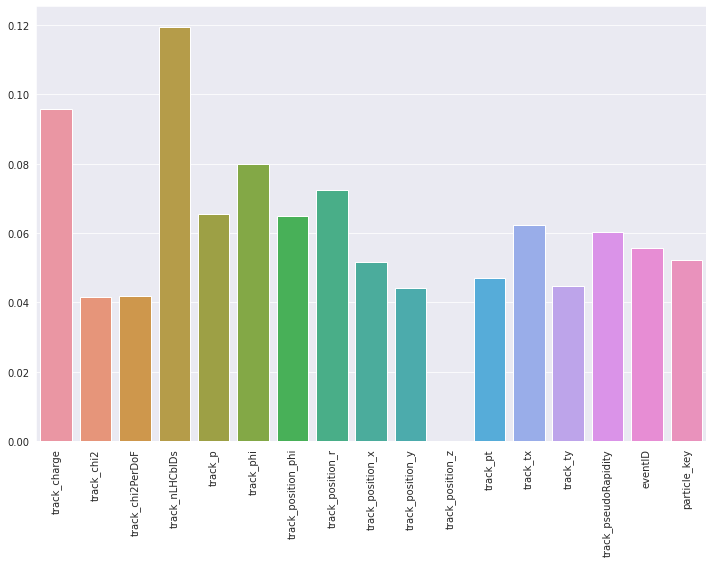

'Accuracy of the model is 0.8953488372093024 %'

In [20]:
model_performance(sample_02,rf)

In [21]:
sample_03=pd.concat([pd.DataFrame(ss.fit_transform(sample_02.drop(['particle_isDown_noVelo'],axis=1)),columns=sample_02.drop(['particle_isDown_noVelo'],axis=1).columns),sample_02['particle_isDown_noVelo'].reset_index(drop=True)],axis=1)

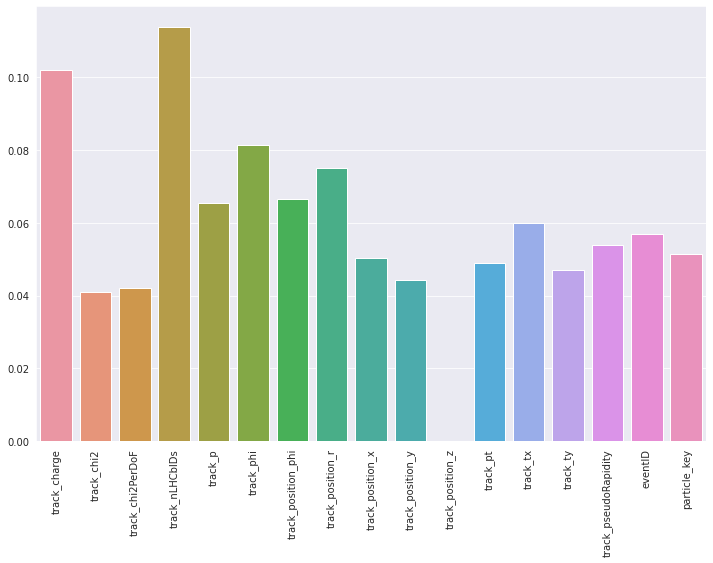

'Accuracy of the model is 0.8915697674418605 %'

In [22]:
model_performance(sample_03,rf)

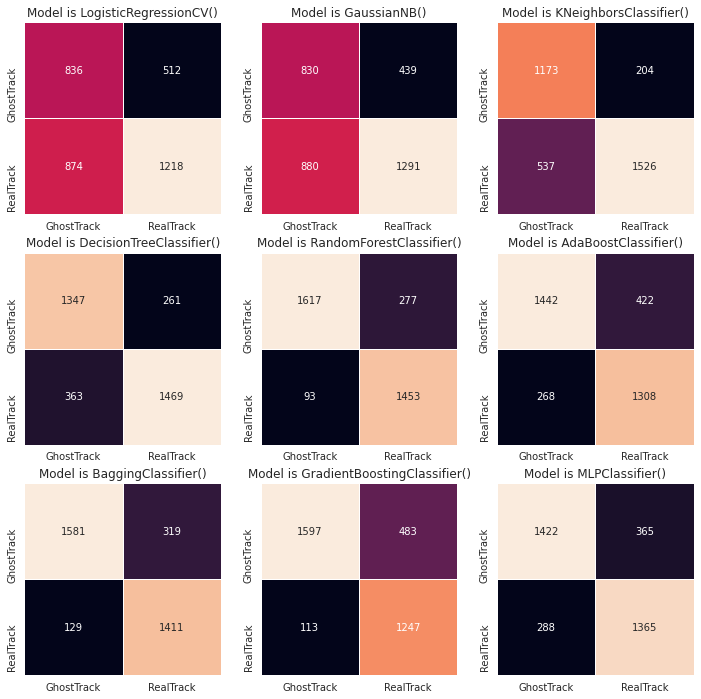

In [23]:
x=sample_03.drop(['particle_isDown_noVelo'],axis=1)
y=sample_03['particle_isDown_noVelo']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

figure,axes=plt.subplots(3,3,figsize=(12,12))
for index_1,value_1 in enumerate(np.array(models).reshape(3,3)):
    for index_2,value_2 in enumerate(value_1):
            value_2.fit(x_train,y_train)
            y_predict=value_2.predict(x_test)
            sns.heatmap(confusion_matrix(y_predict,y_test),annot=True,fmt='d',ax=axes[(index_1,index_2)],cbar=False,xticklabels=['GhostTrack','RealTrack'],yticklabels=['GhostTrack','RealTrack'],linewidths=1,linecolor='w').set_title((f'Model is {value_2}'))

plt.show()



Model Name : DecisionTreeClassifier()


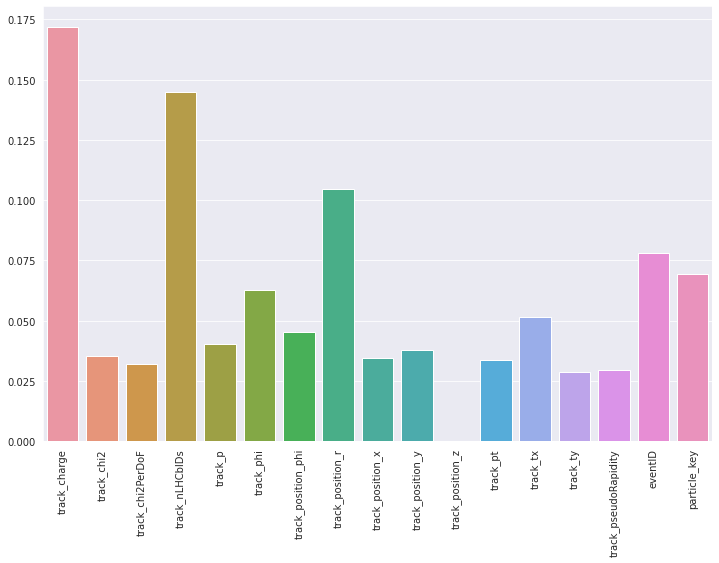

Accuracy of the model is 0.8200581395348837 %


Model Name : RandomForestClassifier()


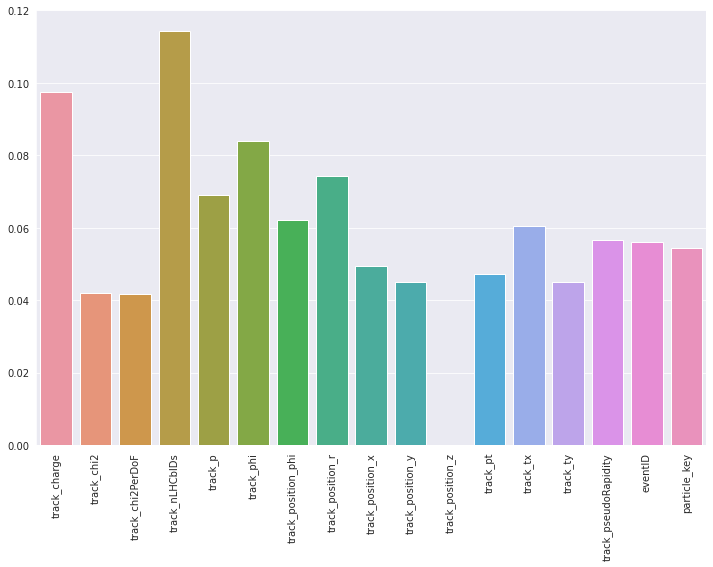

Accuracy of the model is 0.8883720930232558 %


Model Name : AdaBoostClassifier()


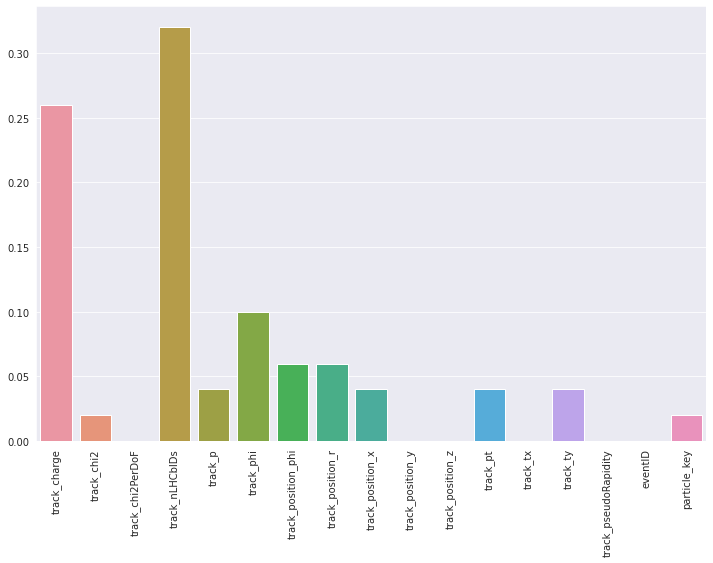

Accuracy of the model is 0.8093023255813954 %


Model Name : GradientBoostingClassifier()


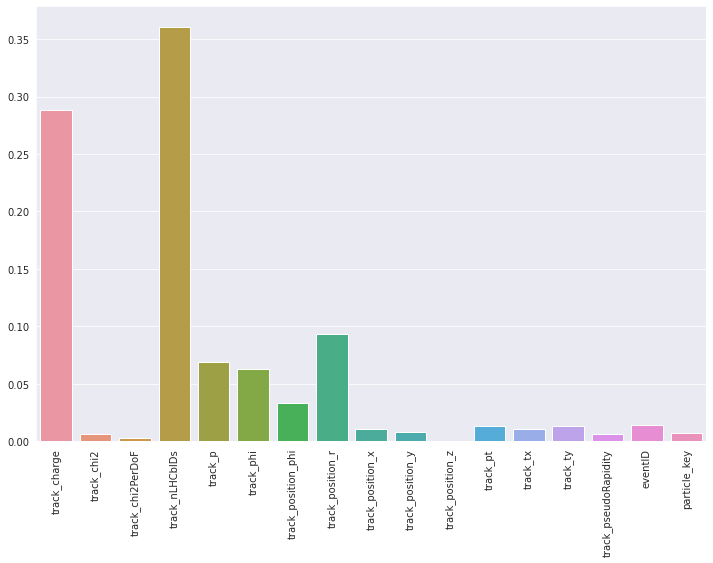

Accuracy of the model is 0.8267441860465117 %


In [24]:
models=[dt,rf,adaboost,grad]
for model in models:
    print('\n')
    print(f'Model Name : {model}')
    print(model_performance(sample_03,model))

      Iter       Train Loss   Remaining Time 
         1           1.3451           43.80s
         2           1.3114           38.22s
         3           1.2682           40.83s
         4           1.2401           41.48s
         5           1.2129           42.32s
         6           1.1859           42.82s
         7           1.1618           42.43s
         8           1.1376           41.96s
         9           1.1210           41.56s
        10           1.1028           40.92s
        20           0.9740           38.29s
        30           0.8989           37.42s
        40           0.8477           36.11s
        50           0.8230           34.52s
        60           0.7967           33.30s
        70           0.7755           32.92s
        80           0.7616           32.36s
        90           0.7470           31.43s
       100           0.7341           30.37s
       200           0.6548           24.27s
       300           0.6032           16.10s
       40

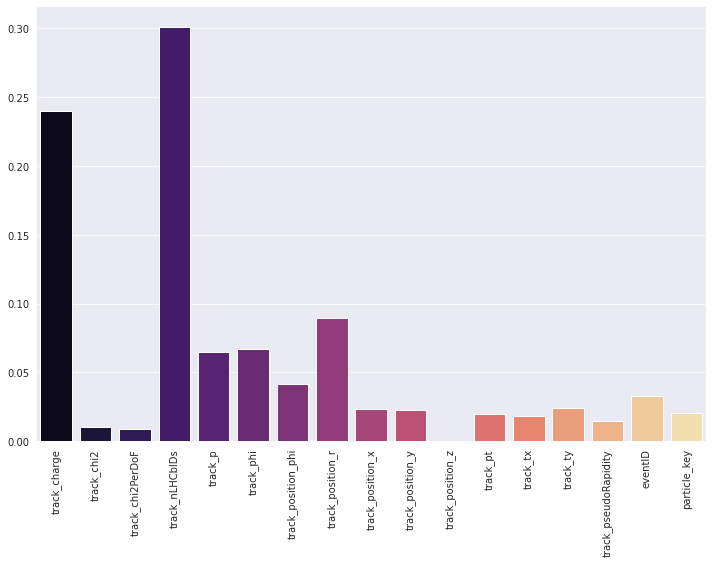

Accuracy of the model is 0.8526162790697674 %


In [25]:
#GradientBoost
grad=GradientBoostingClassifier(n_estimators=500,verbose=True)
x=sample_03.drop(['particle_isDown_noVelo'],axis=1)
y=sample_03['particle_isDown_noVelo']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
grad.fit(x_train,y_train)
y_predict=grad.predict(x_test)
sns.barplot(x=x.columns,y=grad.feature_importances_,palette='magma')
plt.xticks(rotation=90)
plt.show()
print (f'Accuracy of the model is {accuracy_score(y_test,y_predict)} %')